# Adversarial Search: Playing Connect 4

Student Name: Leilani Guzman

I have used the following AI tools: Github Copilot
I understand that my submission needs to be my own work: [your initials]

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

**Your code/answer goes here.**

- **Initial State**: The initial state of the connect 4 game is an empty board, which is setup as a 6x7 array/grid. The array is filled with 0's, which represent empty spaces, and each player is represented by either a 1 or -1.

- **Actions**: The actions are the nonfull columns (using column number) that the player can drop their piece into.

- **Transition Model**: The transition model takes the current state of the board along with the action (column number to play at), and produces the resulting board of adding that players piece to that column.

- **Goal State**: The goal state is when either player has 4 consecutive pieces in a row, column, or a diagonal. The goal state could also be a tie if the entire board is filled but neither player has 4 consecutive pieces.

How big is the state space? Give an estimate and explain it.

- The state space of a 6x7 connect4 board is calculated by taking the number of possible values for each space (3) and raising it to the power of the number of empty spaces (42): $3^{42}$. This is because each space can be empty, player1, or player2. However, this is an overestimate because it does not take into account the fact that the board is filled from the bottom up.


How big is the game tree that minimax search will go through? Give an estimate and explain it.
- The size of the game tree for minimax search is the number of possible moves that can be made at each level of the board (bottom to top). The first level has 7 possible moves, the second level has 7 possible moves, and so on. This means that the game tree has a branching factor of 7. The depth of the game tree is the number of empty spaces on the board, which is 42. Therefore, the size of the game tree is $7^{42}$, which is drastically larger than the state space.

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [1]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

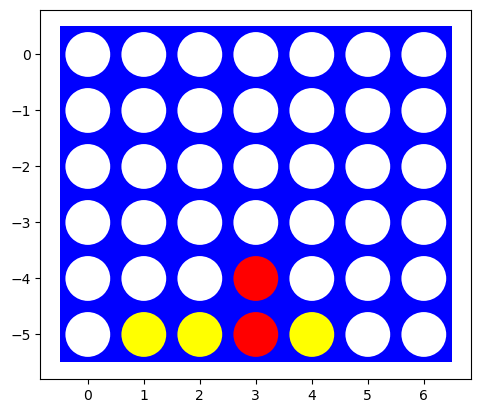

In [2]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [3]:
# 1 is red, -1 is yellow

def available_actions(board):
    # Columns that can be played
    return [i for i in range(len(board[0])) if board[0][i] == 0]


def result(board, action, player):
    # Action is the column to play
    # Player is 1 or -1
    new_board = np.copy(board)
    for i in range(len(board)):
        # If the column is empty
        if i == len(board)-1 and board[i][action] == 0:
            new_board[i][action] = player
            return new_board
        if board[i][action] != 0:
            new_board[i-1][action] = player
            return new_board

# terminal states
def check_for_wins(board):
    # Check for horizontal wins
    for row in range(len(board)):
        for col in range(len(board[row])-3):
            if board[row][col] == board[row][col+1] == board[row][col+2] == board[row][col+3] and board[row][col] != 0:
                # print('Found a horizontal win')
                return board[row][col]

    # Check for vertical
    for col in range(len(board[0])):
        for row in range(len(board)-3):
            if board[row][col] == board[row+1][col] == board[row+2][col] == board[row+3][col] and board[row][col] != 0:
                # print('Found a vertical win')
                return board[row][col]
    
    # Check for diagonal left to right
    for row in range(len(board)-3):
        for col in range(len(board)-3):
            if board[row][col] == board[row+1][col+1] == board[row+2][col+2] == board[row+3][col+3] and board[row][col] != 0:
                # print('Found a diagonal win')
                return board[row][col]
    
    # Check for diagonal right to left
    for row in range(len(board)-3):
        for col in range(3, len(board)):
            if board[row][col] == board[row+1][col-1] == board[row+2][col-2] == board[row+3][col-3] and board[row][col] != 0:
                # print('Found a diagonal win2')
                return board[row][col]
    
    # If no zeros are found, the board is full, check every space and return 0 if no 0's are found
    has_zeros = False
    for row in range(len(board)):
        for col in range(len(board[row])):
            if board[row][col] == 0:
                has_zeros = True
    if not has_zeros:
        return 0
    
    # If no wins are found, return None
    return None


def utility(board, player):
    # If player wins, return 1
    if check_for_wins(board) == player:
        return 1
    # If player loses, return -1
    elif check_for_wins(board) == -player:
        return -1
    # If draw, return 0
    elif check_for_wins(board) == 0:
        return 0
    # If game is not over, return None
    else:
        return None


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [4]:

class random_agent:
    def __init__(self, player):
        self.player = player

    def play(self, board):
        return np.random.choice(available_actions(board))

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [5]:
player1 = random_agent(1)
player2 = random_agent(-1)

player1_wins = 0 # red
player2_wins = 0 # yellow
ties = 0

for _ in range(1000):
    current_player = player1
    board = empty_board()
    while True:
        end = check_for_wins(board)
        if end is not None:
            if end == 1:
                player1_wins += 1
            elif end == -1:
                player2_wins += 1
            else:
                ties += 1
            break
        action = current_player.play(board)
        board = result(board, action, current_player.player)
        current_player = player2 if current_player == player1 else player1

print('Player 1 wins:', player1_wins)
print('Player 2 wins:', player2_wins)
print('Ties:', ties)

Player 1 wins: 532
Player 2 wins: 462
Ties: 6


After letting two random agents play each other 1000 times, it is clear the results were almost half and half, which is expected. Player 1 won roughly 52% of the time and player 2 won around 47% of the time, and the remaining percentage of the time was a tie. This is expected because both players are playing randomly, so there is no advantage for either player.

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [6]:
# Write code for minimax search with alpha-beta pruning here.

def alphabetasearch(board, player):
    _, move = max_value(board, player, -np.inf, np.inf)
    return move

def max_value(board, player, alpha, beta):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return max value of min_value
    v = -np.inf
    best_action = None
    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = min_value(new_board, player, alpha, beta)
        if value > v:
            v, best_action = value, action
        alpha = max(alpha, v)
        if v >= beta:
            break
    return v, best_action

def min_value(board, player, alpha, beta):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return min value of max_value
    v = np.inf
    best_action = None
    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = max_value(new_board, player*-1, alpha, beta)
        if value < v:
            v, best_action = value, action
        beta = min(beta, v)
        if v <= alpha:
            break
    return v, best_action


In [7]:
class alphabeta_agent:
    def __init__(self, player):
        self.player = player
    def play(self, board):
        return alphabetasearch(board, self.player)

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

Board_1 before:


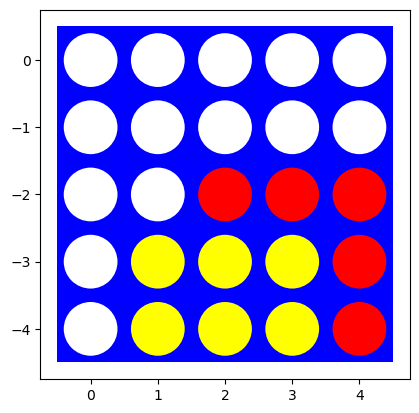

Board_1 after:


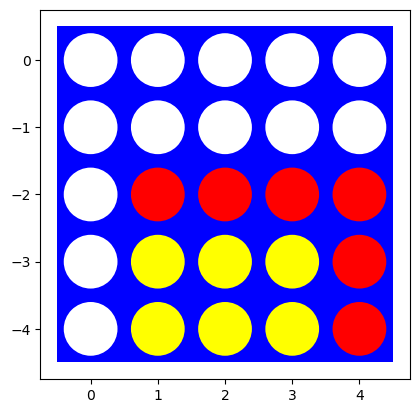

Board_2 before:


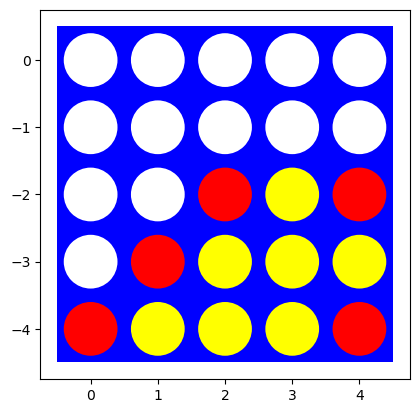

Board_2 after:


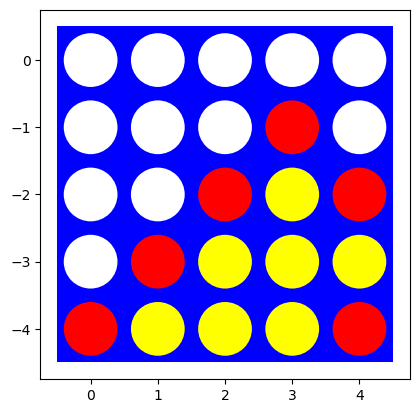

Board_3 before:


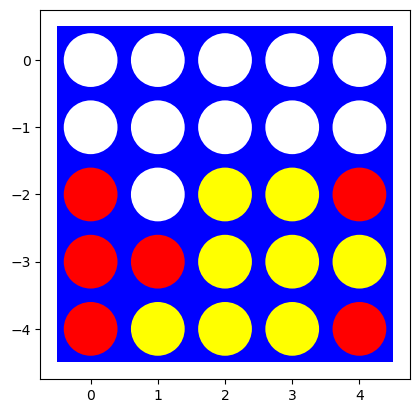

Board_3 after:


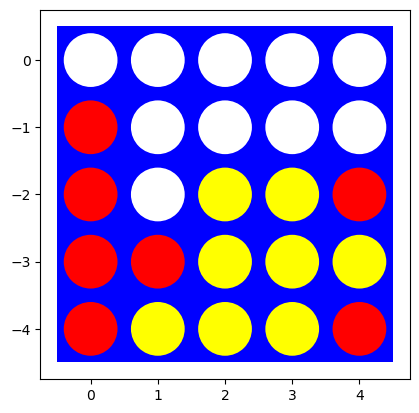

Board_4 before:


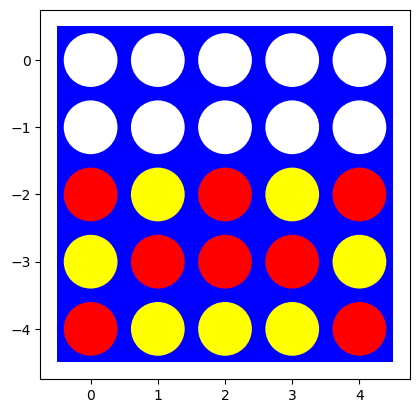

Board_4 after:


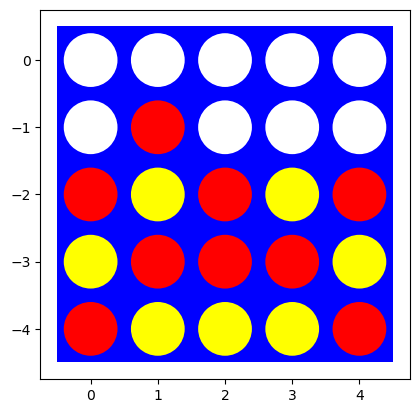

Board_5 before:


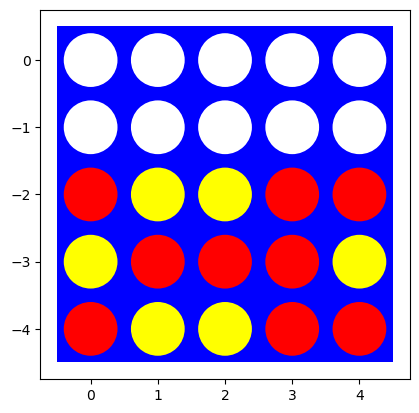

Board_5 after:


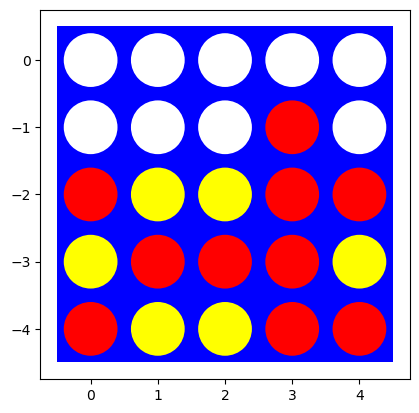

In [8]:
# Create a 4x4 board that is close to winning for red
board_1 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1],
         [0, -1,-1,-1, 1],
         [0, -1,-1,-1, 1]]

print('Board_1 before:')
visualize(board_1)
agent = alphabeta_agent(1)
action = agent.play(board_1)
new_board = result(board_1, action, agent.player)
print('Board_1 after:')
visualize(new_board)

board_2 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 1, -1, 1],
           [0, 1,-1,-1, -1],
           [1, -1,-1,-1, 1]]

print('Board_2 before:')
visualize(board_2)
agent = alphabeta_agent(1)
action = agent.play(board_2)
new_board = result(board_2, action, agent.player)
print('Board_2 after:')
visualize(new_board)

board_3 = [[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [1, 0, -1, -1, 1],
              [1, 1,-1,-1, -1],
              [1, -1,-1,-1, 1]]

print('Board_3 before:')
visualize(board_3)
agent = alphabeta_agent(1)
action = agent.play(board_3)
new_board = result(board_3, action, agent.player)
print('Board_3 after:')
visualize(new_board)

board_4 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, 1, -1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1,-1, 1]]

print('Board_4 before:')
visualize(board_4)
agent = alphabeta_agent(1)
action = agent.play(board_4)
new_board = result(board_4, action, agent.player)
print('Board_4 after:')
visualize(new_board)

board_5 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, -1, 1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1, 1, 1]]

print('Board_5 before:')
visualize(board_5)
agent = alphabeta_agent(1)
action = agent.play(board_5)
new_board = result(board_5, action, agent.player)
print('Board_5 after:')
visualize(new_board)

As seen above, the default minimax search algorithm is not able to find the winning move in all the custom boards used.

In [9]:
# helper function for later on
def empty_board(shape):
    return np.full(shape=shape, fill_value=0)

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [10]:
import time

player1 = alphabeta_agent(1) # red
player2 = alphabeta_agent(-1) # yellow

# Make a 4x4 board
board1 = [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [1, -1, -1, 1],
         [-1, 1,1,1]]

# Make a 4x5 board
board2 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [-1, 1, -1, 1, -1],
         [1, -1,1,-1, 1]]

# Make a 4x6 board
board3 = [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, -1, 0, 0],
         [-1, 1, -1, 1, -1, 0],
         [1, -1,1,-1, 1, 0]]

# Make a 4x7 board
board4 = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, -1, -1, 0, 0, 0],
         [-1, 1, -1, 1, -1, 0, 0],
         [1, -1,1,-1, 1, -1, 1]]

# Make a 4x8 board
board5 = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, -1, -1, 0, 0, 0],
         [-1, 1, -1, 1, -1, 0, 0],
         [1, -1,1,-1, 1, -1, 1]]

boards = [board1, board2, board3, board4, board5]
player1 = alphabeta_agent(1) # red

alphabeta_times = []

for board in boards:
    start = time.time()
    action = player1.play(board)
    end = time.time()
    print(f'Time to make a move on a {len(board)}x{len(board[0])} board:', end-start)
    alphabeta_times.append(end-start)


Time to make a move on a 4x4 board: 0.13985705375671387
Time to make a move on a 4x5 board: 1.4521305561065674


Time to make a move on a 4x6 board: 6.601820468902588
Time to make a move on a 4x7 board: 6.883092403411865
Time to make a move on a 4x7 board: 5.363231182098389


### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [11]:
# Implement a move ordering strategy that prioritizes moves that will win the game
# and then moves that will block the opponent from winning the game.

def move_ordering(board, player, moves):
    winning_moves = [move for move in moves if is_winning_move(board, move, player)]
    if winning_moves:
        return winning_moves
    
    blocking_moves = [move for move in moves if is_blocking_move(board, move, player)]
    if blocking_moves:
        return blocking_moves
    
    return moves

def is_winning_move(board, move, player):
    new_board = result(board, move, player)
    return check_for_wins(new_board) == player

def is_blocking_move(board, move, player):
    new_board = result(board, move, player)
    return check_for_wins(new_board) == -player

In [12]:
def alphabetasearch_ordering(board, player):
    _, move = max_value_ordering(board, player, -np.inf, np.inf)
    return move

def max_value_ordering(board, player, alpha, beta):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return max value of min_value
    v = -np.inf
    best_action = None
    moves = available_actions(board)
    ordered_moves = move_ordering(board, player, moves)
    for action in ordered_moves:
        new_board = result(board, action, player)
        value, _ = min_value_ordering(new_board, player, alpha, beta)
        if value > v:
            v, best_action = value, action
        alpha = max(alpha, v)
        if v >= beta:
            break
    return v, best_action

def min_value_ordering(board, player, alpha, beta):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return min value of max_value
    v = np.inf
    best_action = None
    moves = available_actions(board)
    ordered_moves = move_ordering(board, player, moves)
    for action in ordered_moves:
        new_board = result(board, action, player)
        value, _ = max_value_ordering(new_board, player*-1, alpha, beta)
        if value < v:
            v, best_action = value, action
        beta = min(beta, v)
        if v <= alpha:
            break
    return v, best_action

class alphabeta_agent_ordering:
    def __init__(self, player):
        self.player = player
    def play(self, board):
        return alphabetasearch_ordering(board, self.player)

In [13]:
alphabeta_ordering_times = []

for board in boards:
    start = time.time()
    action = player1.play(board)
    end = time.time()
    print(f'Time to make a move on a {len(board)}x{len(board[0])} board (move ordering):', end-start)
    alphabeta_ordering_times.append(end-start)


Time to make a move on a 4x4 board (move ordering): 0.023193836212158203
Time to make a move on a 4x5 board (move ordering): 0.11257195472717285
Time to make a move on a 4x6 board (move ordering): 0.8041286468505859
Time to make a move on a 4x7 board (move ordering): 4.144853115081787
Time to make a move on a 4x7 board (move ordering): 4.18738055229187


In [14]:
# Make a table to compare the times of the alphabeta agent with and without move ordering times

import pandas as pd


df = pd.DataFrame({'Board Size': ['4x4', '4x5', '4x6', '4x7', '4x8'],
                   'AlphaBeta Time': [round(time, 2) for time in alphabeta_times],
                   'AlphaBeta Ordering Time': [round(time, 2) for time in alphabeta_ordering_times]})

df


,Board Size,AlphaBeta Time,AlphaBeta Ordering Time
0,4x4,0.14,0.02
1,4x5,1.45,0.11
2,4x6,6.60,0.80
3,4x7,6.88,4.14
4,4x8,5.36,4.19


Based on this table, it is clear that the alpha beta search with move ordering runs much faster the alpha beta search without move ordering. The move ordering strategy used was to order the moves with emphasis on moves that block the opponent from winning.

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

- In order to combat this worst case scenarion for minimax search with an empty board, a cutoff depth can be implemented. This cutoff depth will limit the number of moves that minimax search will look ahead, making the search more efficient, but it will also make the agent less intelligent because it will not be able to look ahead as many moves. This will be implemented in the next task.

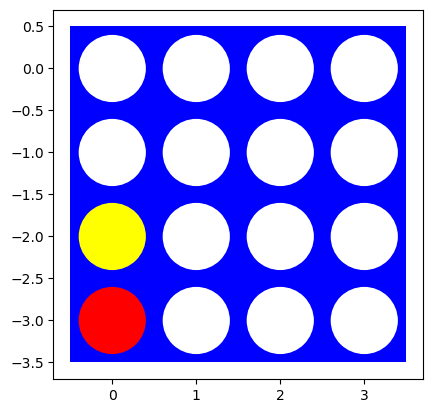

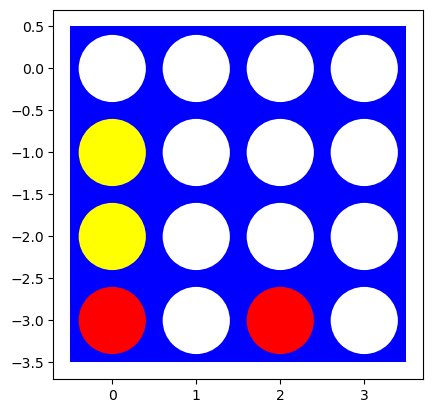

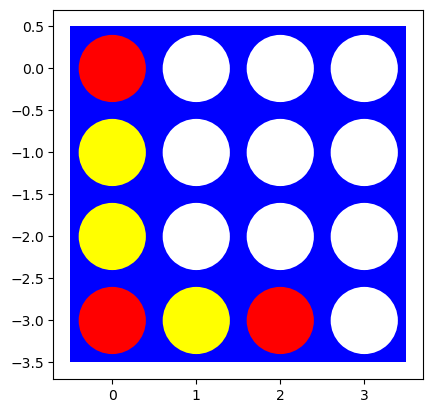

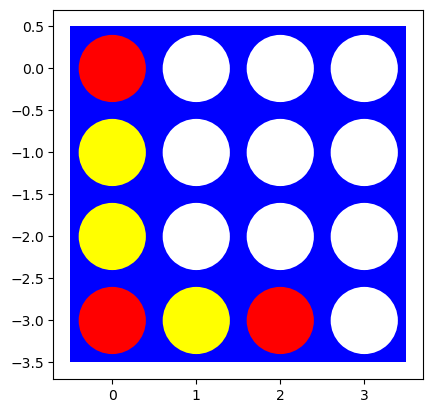

CPU times: total: 3.05 s
Wall time: 9.95 s


In [16]:
%%time
# Use move ordering to prioritize moves that will win the game and then moves that will 
# block the opponent from winning the game.

board = empty_board((4, 4))

player1 = alphabeta_agent(1) # red
player2 = alphabeta_agent_ordering(-1) # yellow

for _ in range(3):
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player1.play(board)
    board = result(board, action, player1.player)
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player2.play(board)
    board = result(board, action, player2.player)
    
visualize(board)

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [18]:
%%time
player1 = alphabeta_agent_ordering(1) # red
player2 = random_agent(-1) # yellow

player1_wins = 0 # red
player2_wins = 0 # yellow
ties = 0

for _ in range(20):
    current_player = player1
    board = empty_board((4, 4))
    while True:
        end = check_for_wins(board)
        if end is not None:
            if end == 1:
                player1_wins += 1
                break
            elif end == -1:
                player2_wins += 1
                break
            else:
                ties += 1
            break
        action = current_player.play(board)
        board = result(board, action, current_player.player)
        current_player = player2 if current_player == player1 else player1

print('Player 1 wins:', player1_wins)
print('Player 2 wins:', player2_wins)
print('Ties:', ties)

Player 1 wins: 7
Player 2 wins: 4
Ties: 9


After letting the mini max agent with move ordering play a random agent on a small board, it is clear that the mini max agent wins more than the random agent, which is expected because the mini max agent is more intelligent than the random agent. However, there are still some losses and draws, which is expected because the random agent is still able to win sometimes when it's lucky

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [64]:
# Heuristic Alpha-Beta Tree Search
# Reduce the search cost by restricting the depth of the game tree

def heuristic(state, player=1):
    # Based on example from class for tic tac toe
    # For non-terminal states, it calculates a weighted linear function using features of the state.

    # Terminal state
    util = utility(state, player)
    if util is not None:
        return util

    score = 0
    board = np.array(state)

    # Check horizontally and vertically
    for i in range(len(board)):
        for j in range(len(board[0])):
            if (
                j + 2 < len(board[0])
                and board[i][j] == player
                and board[i][j + 1] == player
                and board[i][j + 2] == 0
            ):
                score += 0.4
            if (
                i + 2 < len(board)
                and board[i][j] == player
                and board[i + 1][j] == player
                and board[i + 2][j] == 0
            ):
                score += 0.4

    # Check diagonally
    for i in range(len(board) - 2):
        for j in range(len(board[0]) - 2):
            if (
                board[i][j] == player
                and board[i + 1][j + 1] == player
                and board[i + 2][j + 2] == 0
            ):
                score += 0.4

            if (
                board[i + 2][j] == 0
                and board[i + 1][j + 1] == player
                and board[i][j + 2] == player
            ):
                score += 0.4

    return score

### Cutting off search [10 points]

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [65]:
# Make sure to use a cutoff depth (dynamic depth) to limit the search space
# If the depth is 0, return the heuristic value of the board
# If the depth is greater than 0, return the max value of the min_value function

def heuristic_search(board, player, depth):
    _, move = max_value_heuristic(board, player, -np.inf, np.inf, depth)
    return move

def max_value_heuristic(board, player, alpha, beta, depth):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return max value of min_value
    if depth == 0:
        return heuristic(board, player), None
    v = float('-inf')
    best_action = None
    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = min_value_heuristic(new_board, player, alpha, beta, depth-1)
        if value is not None and value > v:
            v, best_action = value, action
        alpha = max(alpha, v)
        if v >= beta:
            break
    return v, best_action

def min_value_heuristic(board, player, alpha, beta, depth):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return min value of max_value
    if depth == 0:
        return heuristic(board, player), None
    v = float('inf')
    best_action = None
    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = max_value_heuristic(new_board, player*-1, alpha, beta, depth-1)
        if value is not None and value < v:
            v, best_action = value, action
        beta = min(beta, v)
        if v <= alpha:
            break
    return v, best_action

class heuristic_agent:
    def __init__(self, player, depth):
        self.player = player
        self.depth = depth
    def play(self, board):
        return heuristic_search(board, self.player, self.depth)

Initial board:


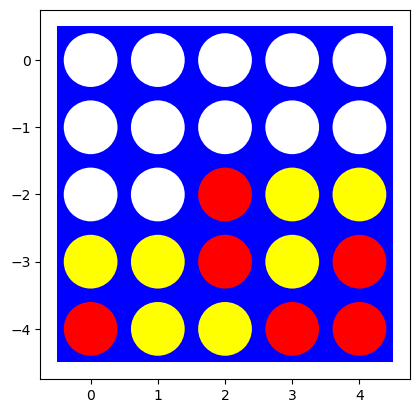

Board using cutoff depth of 2:


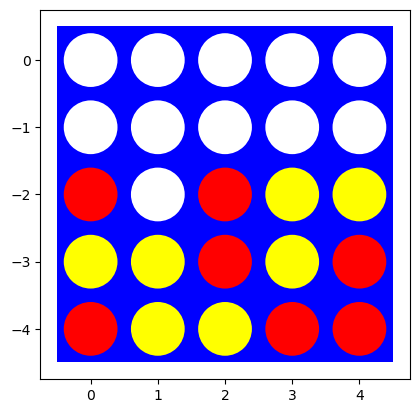

Board using cutoff depth of 4:


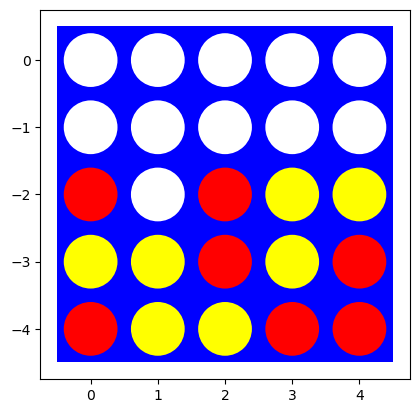

Board using cutoff depth of 8:


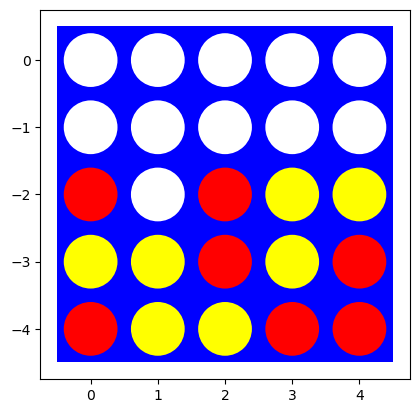

In [72]:
# Experiment with different cutoff depths

player1 = heuristic_agent(1, 4) # red

# Make a 4x5 board
board2 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 1, -1, -1],
         [-1, -1,1,-1, 1],
         [1, -1,-1,1, 1]]

print('Initial board:')
visualize(board2)

start = time.time()
action = player1.play(board2)
end = time.time()
new_board = result(board2, action, player1.player)
print('Board using cutoff depth of 2:')
visualize(new_board)

# print(f'Time to make a move on a 6x7 board with depth 1: {end-start} seconds')

player2 = heuristic_agent(1, 6) # red

start = time.time()
action = player2.play(board2)
end = time.time()
new_board = result(board2, action, player2.player)
print('Board using cutoff depth of 4:')
visualize(new_board)


player3 = heuristic_agent(1, 10) # red

start = time.time()
action = player3.play(board2)
end = time.time()
new_board = result(board2, action, player3.player)
print('Board using cutoff depth of 8:')
visualize(new_board)

As seen above, different cutoff values still result in the same move.


Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

Board_1 before:


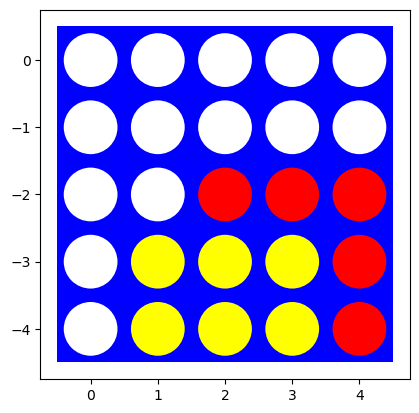

Board_1 after:


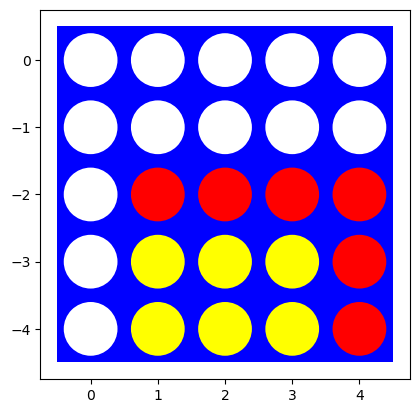

Board_2 before:


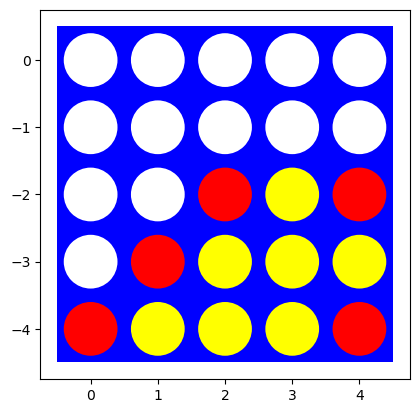

Board_2 after:


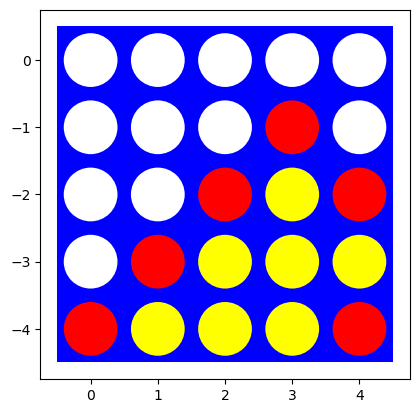

Board_3 before:


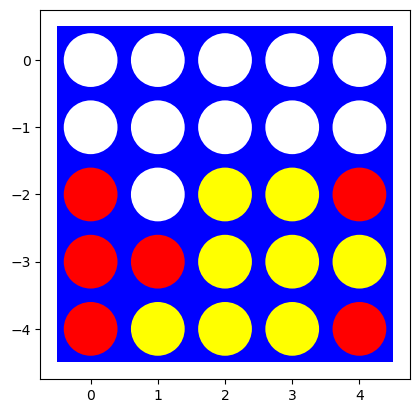

Board_3 after:


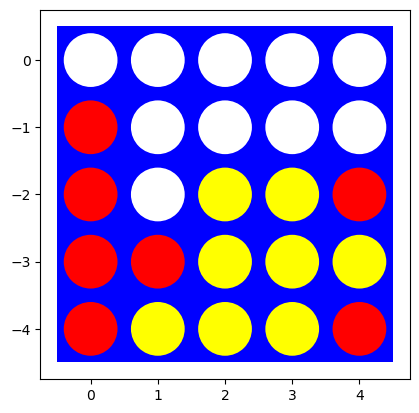

Board_4 before:


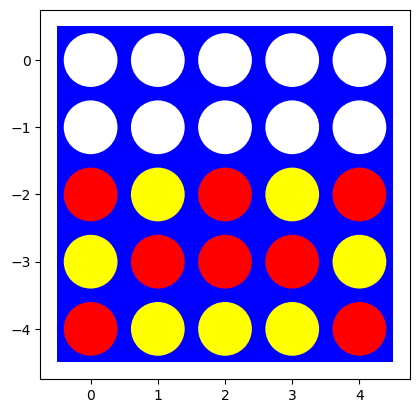

Board_4 after:


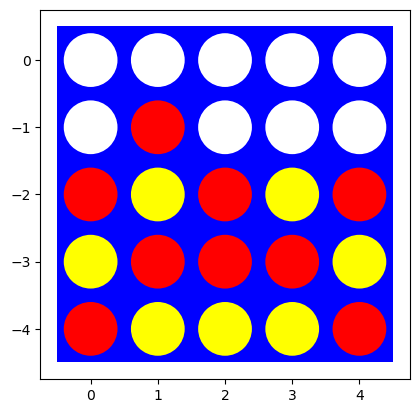

Board_5 before:


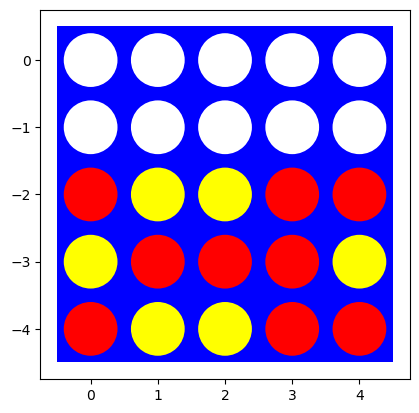

Board_5 after:


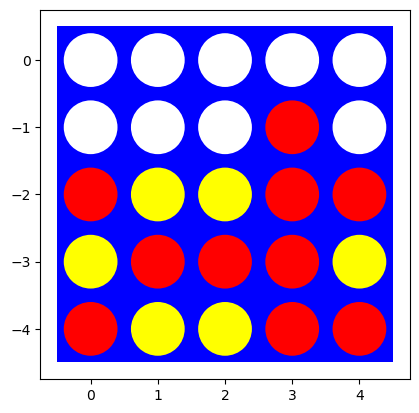

In [67]:
board_1 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1],
         [0, -1,-1,-1, 1],
         [0, -1,-1,-1, 1]]

print('Board_1 before:')
visualize(board_1)
agent = heuristic_agent(1, 8)
action = agent.play(board_1)
new_board = result(board_1, action, agent.player)
print('Board_1 after:')
visualize(new_board)

board_2 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 1, -1, 1],
           [0, 1,-1,-1, -1],
           [1, -1,-1,-1, 1]]

print('Board_2 before:')
visualize(board_2)
agent = heuristic_agent(1, 8)
action = agent.play(board_2)
new_board = result(board_2, action, agent.player)
print('Board_2 after:')
visualize(new_board)

board_3 = [[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [1, 0, -1, -1, 1],
              [1, 1,-1,-1, -1],
              [1, -1,-1,-1, 1]]

print('Board_3 before:')
visualize(board_3)
agent = heuristic_agent(1, 8)
action = agent.play(board_3)
new_board = result(board_3, action, agent.player)
print('Board_3 after:')
visualize(new_board)

board_4 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, 1, -1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1,-1, 1]]

print('Board_4 before:')
visualize(board_4)
agent = heuristic_agent(1, 8)
action = agent.play(board_4)
new_board = result(board_4, action, agent.player)
print('Board_4 after:')
visualize(new_board)

board_5 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, -1, 1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1, 1, 1]]

print('Board_5 before:')
visualize(board_5)
agent = heuristic_agent(1, 8)
action = agent.play(board_5)
new_board = result(board_5, action, agent.player)
print('Board_5 after:')
visualize(new_board)

As before, even with the added cutoff search the agent is still able to find the winning move. 

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [73]:
import timeit

player1 = heuristic_agent(1, 8) # red

# Make a 4x4 board
board1 = [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [1, -1, -1, 1],
         [-1, 1,1,1]]

# Make a 4x5 board
board2 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [-1, 1, -1, 1, -1],
         [1, -1,1,-1, 1]]

# Make a 4x6 board
board3 = [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, -1, 0, 0],
         [-1, 1, -1, 1, -1, 0],
         [1, -1,1,-1, 1, 0]]

# Make a 4x7 board
board4 = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, -1, -1, 0, 0, 0],
         [-1, 1, -1, 1, -1, 0, 0],
         [1, -1,1,-1, 1, -1, 1]]

# Make a 4x8 board
board5 = [[0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, -1, -1, 0, 0, 0, 0],
          [-1, 1, -1, 1, -1, 0, 0, 0],
          [1, -1,1,-1, 1, -1, 1, 1]]
          

boards = [board1, board2, board3, board4, board5]

for board in boards:
    start = timeit.default_timer()
    action = player1.play(board)
    end = timeit.default_timer()
    print(f'Time to make a move on a {len(board)}x{len(board[0])} board:', end-start)

Time to make a move on a 4x4 board: 0.020419899999978952
Time to make a move on a 4x5 board: 0.06321550000029674
Time to make a move on a 4x6 board: 0.16201679999994667
Time to make a move on a 4x7 board: 0.32630560000052355
Time to make a move on a 4x8 board: 0.7577503000002253


Based on the above times, using the heuristic function and cuttoff search clearly is able to make a move in a shorter amount of time than the original minimax search with alpha-beta pruning. This is because the cutoff search limits the number of moves that minimax search will look ahead, making the search more efficient, but it could also make the agent less intelligent if it does not look far enough ahead to make an optimal move.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [74]:
# Heuristic that takes into account the number of pieces each player has on the board

def heuristic2(board, player):
    score = 0

    # Evaluate player's moves
    for row in range(len(board)):
        for col in range(len(board[0])):
            if board[row][col] == player:
                score += 1  # Increase score for each of the players pieces

    # Evaluate opponent's moves
    opponent = -player
    for row in range(len(board)):
        for col in range(len(board[0])):
            if board[row][col] == opponent:
                score -= 1  # Decrease score for opponent's pieces

    return score

def forward_pruning_minimax(board, player, alpha, beta, depth, heuristic_function):
    # Minimax search with alpha-beta pruning and forward pruning based on a heuristic function.
    
    end = check_for_wins(board)
    if end is not None or depth == 0:
        return heuristic_function(board, player), None

    v = float('-inf')
    best_action = None

    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = forward_pruning_minimax(new_board, player, alpha, beta, depth - 1, heuristic_function)

        if value > v:
            v, best_action = value, action

        alpha = max(alpha, v)

        if v >= beta:
            break  # Prune remaining branches if beta cutoff

    return v, best_action

class forward_pruning_agent:
    def __init__(self, player, depth, heuristic_function):
        self.player = player
        self.depth = depth
        self.heuristic_function = heuristic_function

    def play(self, board):
        _, move = forward_pruning_minimax(board, self.player, float('-inf'), float('inf'), self.depth, self.heuristic_function)
        return move
    

Tie


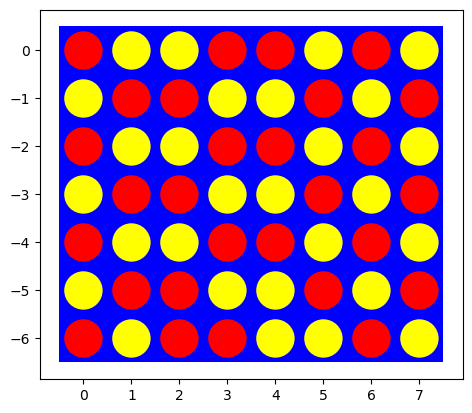

CPU times: total: 48.8 s
Wall time: 51.1 s


In [75]:
%%time
player1 = forward_pruning_agent(1, 3, heuristic2) # red
player2 = heuristic_agent(-1, 8) # yellow

board = empty_board((7, 8))

while True:
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player1.play(board)
    board = result(board, action, player1.player)
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player2.play(board)
    board = result(board, action, player2.player)

visualize(board)

Clearly both agents are able to play optimally, which results in the game being a tie. Even though both are using a slightly different heuristic, they are able to play optimally enough to always counteract the other player's moves.

## Challenge task [+ 10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+10 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [76]:
# Pure Monte Carlo Search
# Do simulations starting from the current state of the game, and track which of the 
# possible moves from the current position has the highest win percentage/statistics

def monte_carlo_search(board, player, simulations):

    action_statistics = {}

    for action in available_actions(board):
        action_statistics[action] = [0, 0]

    for _ in range(simulations):
        # Do a simulation starting from the current state of the game.
        # Track which of the possible moves from the current position has the highest win percentage.
        action = np.random.choice(available_actions(board))

        new_board = np.copy(board)
        # Play the action on the board
        new_board = result(new_board, action, player)

        # Simulate the rest of the game
        winner = simulate(new_board, action, player)

        # Update the number of wins and number of simulations for the action
        action_statistics[action][1] += 1
        if winner == player:
            action_statistics[action][0] += 1

    # Return the action with the highest win percentage
    # Check for divide by 0 error
    if action_statistics:
        return max(action_statistics, key=lambda x: action_statistics[x][0] / action_statistics[x][1])
    else:
        return np.random.choice(available_actions(board))

def simulate(new_board, action, player):
    # Simulate the rest of the game
    current_player = player
    while True:
        end = check_for_wins(new_board)
        if end is not None:
            return end
        action = np.random.choice(available_actions(new_board))
        new_board = result(new_board, action, current_player)
        current_player = current_player*-1

class monte_carlo_agent:
    def __init__(self, player, simulations):
        self.player = player
        self.simulations = simulations
    def play(self, board):
        return monte_carlo_search(board, self.player, self.simulations)

Board_1 before:


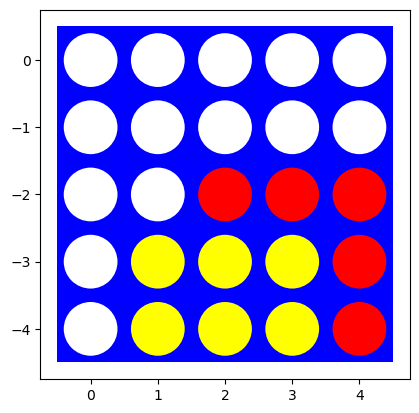

Time to make a move: 0.09623949999968318 seconds
Board_1 after:


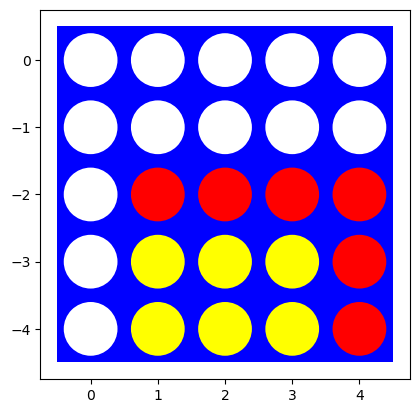

Board_2 before:


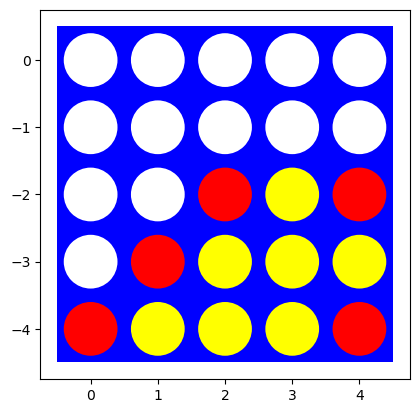

Time to make a move: 0.12056140000004234 seconds
Board_2 after:


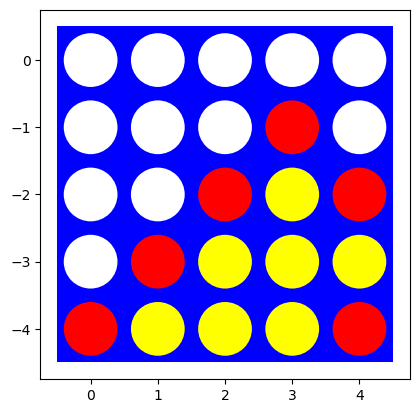

Board_3 before:


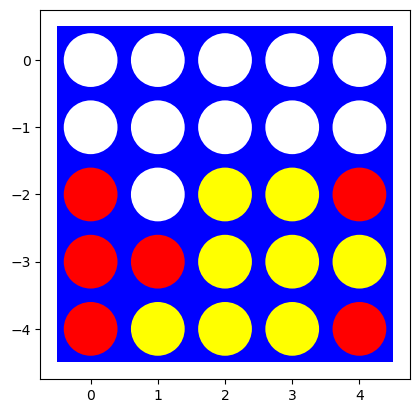

Time to make a move: 0.12148960000013176 seconds
Board_3 after:


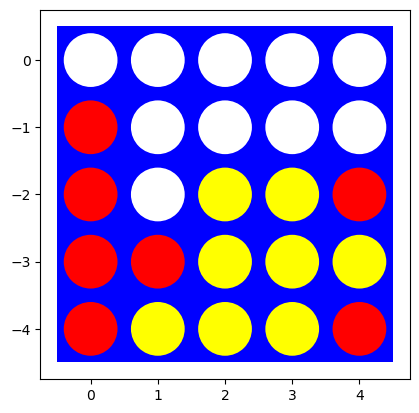

Board_4 before:


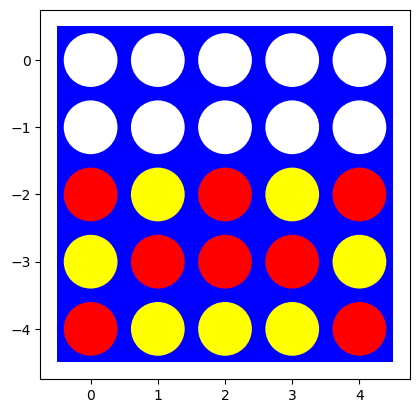

Time to make a move: 0.10806260000026668 seconds
Board_4 after:


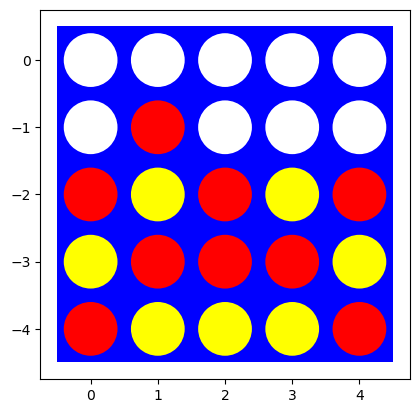

Board_5 before:


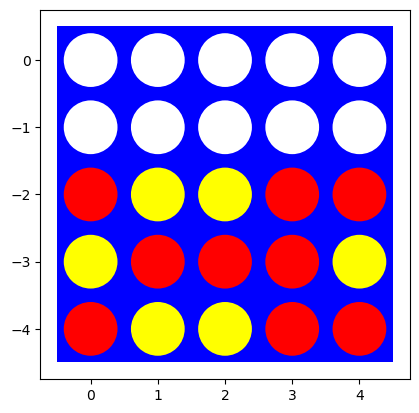

Time to make a move: 0.19488490000003367 seconds
Board_5 after:


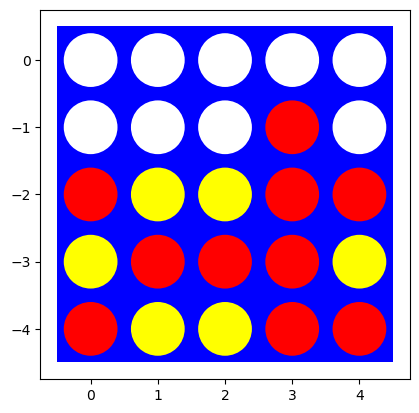

In [77]:
board_1 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1],
         [0, -1,-1,-1, 1],
         [0, -1,-1,-1, 1]]

print('Board_1 before:')
visualize(board_1)
agent = monte_carlo_agent(1, 1000)
start = timeit.default_timer()
action = agent.play(board_1)
end = timeit.default_timer()
new_board = result(board_1, action, agent.player)
print(f'Time to make a move: {end-start} seconds')
print('Board_1 after:')
visualize(new_board)

board_2 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 1, -1, 1],
           [0, 1,-1,-1, -1],
           [1, -1,-1,-1, 1]]

print('Board_2 before:')
visualize(board_2)
start = timeit.default_timer()
action = agent.play(board_2)
end = timeit.default_timer()
new_board = result(board_2, action, agent.player)
print(f'Time to make a move: {end-start} seconds')
print('Board_2 after:')
visualize(new_board)

board_3 = [[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [1, 0, -1, -1, 1],
              [1, 1,-1,-1, -1],
              [1, -1,-1,-1, 1]]

print('Board_3 before:')
visualize(board_3)
start = timeit.default_timer()
action = agent.play(board_3)
end = timeit.default_timer()
new_board = result(board_3, action, agent.player)
print(f'Time to make a move: {end-start} seconds')
print('Board_3 after:')
visualize(new_board)

board_4 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, 1, -1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1,-1, 1]]

print('Board_4 before:')
visualize(board_4)
start = timeit.default_timer()
action = agent.play(board_4)
end = timeit.default_timer()
new_board = result(board_4, action, agent.player)
print(f'Time to make a move: {end-start} seconds')
print('Board_4 after:')
visualize(new_board)

board_5 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, -1, 1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1, 1, 1]]

print('Board_5 before:')
visualize(board_5)
start = timeit.default_timer()
action = agent.play(board_5)
end = timeit.default_timer()
new_board = result(board_5, action, agent.player)
print(f'Time to make a move: {end-start} seconds')
print('Board_5 after:')
visualize(new_board)

As seen above, the Monte Carlo Agent can also find the optimal moves on the test boards. However, it is not as time efficient as the minimax search with alpha-beta pruning because it takes slightly longer to make a move.

### Best First Move

Use Pure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

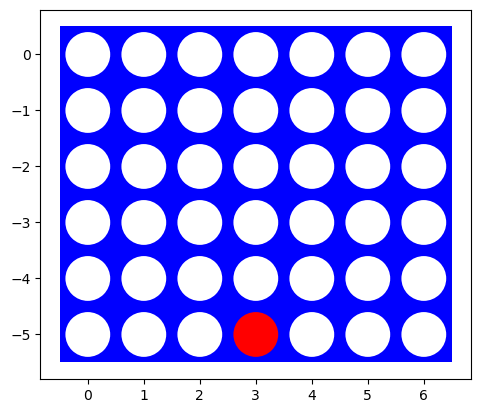

In [55]:
board = empty_board((6, 7))

player1 = monte_carlo_agent(1, 1000) # red

# Make first move
action = player1.play(board)
board = result(board, action, player1.player)

visualize(board)

Based on the above code, it can be seen that the Pure Monte Carlo agent chooses the middle column as the "best" first move. By deciding that this is the best first move the agent is assuming that the middle column is the most likely to lead to a win. This is accurate since even in other automated connect 4 agents, the middle column is often chosen as the first (optimal) move.

Now 2 Monte Carlo Search agents will battle it out for fun.

Player 1 wins


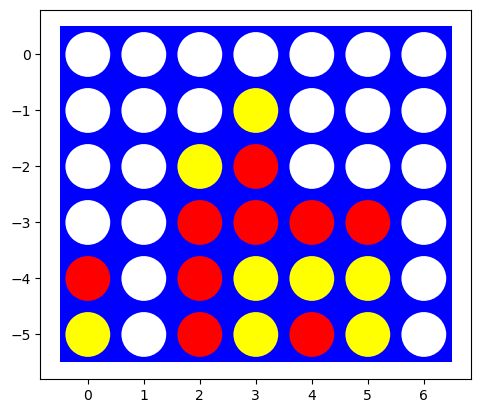

CPU times: total: 15 s
Wall time: 16.1 s


In [78]:
%%time
board = empty_board((6,7))

player1 = monte_carlo_agent(1, 1000) # red
player2 = monte_carlo_agent(-1, 1000) # yellow

while True:
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player1.play(board)
    board = result(board, action, player1.player)
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player2.play(board)
    board = result(board, action, player2.player)

visualize(board)

One of the Monte Carlo agents was able to win, however, since the agents are still randomly choosing moves there is no guarantee that one specific agent will win.